
# Master Informatique, parcours Data Mining

### Carnets de note Python pour le cours de Text Mining

Julien Velcin, laboratoire ERIC, Université Lyon 2

# Représentation des documents (partie 1)

## Nous allons voir :

* Considérations générales
* Modèle du sac de mots (*bag of words*) et matrice Documents x Termes
* Extraire des caractéristiques (tokenisation, prétraitements)
* Schémas de pondération (TF, TFxIDF...)
* Comparer deux textes
* Application : construire son propre moteur de recherche

## Considérations générales

Il existe differentes manières de représenter des données textuelles :

- Chaîne de caractères (string)
- Bag-of-Words (BoW)
- Vector Space Model (VSM)
- Séquence de mots
- Ajouter des méta-données (par ex. catégories grammaticales)
- Représentations plus complexes : arbres syntaxiques, graphes, etc.

Chaque représentation implique une manière différente de *comparer* les documents.

## Un exemple très simple

*"John Doe has bought an apple."*

Point de vue linguistique:

<table style="border:0;">
<tr style="border:0;">
<td style="border:0; white-space:pre; padding:0 100px 0 0px;">"John Doe has bought an apple."</td>
<td style="border:0;"><img src="img/syntaxtree.png" style='height: 150px'/></td>
</tr>
</table>

Point de vue statistique :

<img src="img/bow-illu.png" style='height: 150px'/>

<table style="border:0;">
<tr style="border:0;">
<td style="border:0; white-space:pre; padding:0 100px 0 0px;">"John Doe has bought an apple."</td>
<td style="border:0;">{ apple,<br/><br/> bought,<br/><br/>John_Doe } </td>
</tr>
</table>

<img src="img/bow.png" style='height: 400px'/>

On peut déjà observer des problèmes évidents, tel que :

*"Mary asked Fred out."*
<br/>
*"Fred asked Mary out."*

La représentation est la même :
<img src="img/mary.png" style='height: 200px'/>

A partir d'un *ensemble* de documents, on souhaite obtenir l'objet suivant :
<img src="img/termdocmatrix.png" style='height: 300px'/>
ou sa transposée : la matrice Documents x Termes :
<img src="img/doctermmatrix.png" style='height: 300px'/>

Par exemple :
<img src="img/termdocmatrix-2.jpg" style='width: 400px'/>

# Extraire les caractéristiques des textes avec le modèle "sac de mots"

En pratique, on utilise le formalisme du "sac de mots" et on suit plusieurs étapes :

<img src="img/bag_of_words.svg" width="100%">


Prenons à présent deux documents, tels que :

In [2]:
X = ["Some say the world will end in fire,",
     "Some say in ice."]

In [3]:
len(X)

2

La librairie contient une fonction qui permet de "vectoriser" un ensemble de textes en prenant en compte un certain nombre de prétraitements (*preprocessing*) couramment employés : mis en minuscule, utilisation de mots-outils, etc.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

Observons le vocabulaire automatiquement construit à partir de ces deux textes :

In [5]:
vectorizer.vocabulary_

{'some': 5,
 'say': 4,
 'the': 6,
 'world': 8,
 'will': 7,
 'end': 0,
 'in': 3,
 'fire': 1,
 'ice': 2}

Une illustration bien utile, tirée de : Natural Language Processing in Action: Understanding, analyzing, and generating text with Python, par Hobson Lane, Cole Howard, Hannes Hapke, 2019, ISBN 9781617294631 (https://www.manning.com/books/natural-language-processing-in-action) :

<img src="img/process.jpg" width="250">

# Matrice documents x termes

On peut maintenant construire la matrice documents * termes :

In [6]:
X_bag_of_words = vectorizer.transform(X)

In [7]:
X_bag_of_words

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [8]:
X_bag_of_words.shape

(2, 9)

Jetons un oeil au contenu de la matrice :

In [9]:
X_bag_of_words.toarray()

array([[1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0]], dtype=int64)

On observe que la valeur indiquée dans une cellule est le nombre d'occurrences d'un terme dans un document (TF pour *Term Frequency*)

On peut également retrouver le nom des termes du vocabulaire :

In [10]:
vectorizer.get_feature_names()

C:\Users\libas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['end', 'fire', 'ice', 'in', 'say', 'some', 'the', 'will', 'world']

On peut retrouver les attributs (features) utilisés dans les documents :

In [11]:
vectorizer.inverse_transform(X_bag_of_words)

[array(['end', 'fire', 'in', 'say', 'some', 'the', 'will', 'world'],
       dtype='<U5'),
 array(['ice', 'in', 'say', 'some'], dtype='<U5')]

# Représentation TFxIDF
A la place du nombre d'occurrences (TF), on peut utiliser une autre mesure qui prend en compte la rareté d'un mot dans le corpus :

$$ tf_{t,d} \times idf_{t} $$

avec $tf_{t,d}$ le nombre d'occurrences de $t$ dans $d$

et $idf_{t} = \log \frac{N}{df_t}$ ($N$ est le nombre total de documents ; $df_t$ nombre de documents où le terme apparaît)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

TfidfVectorizer()

In [ ]:
import numpy as np
np.set_printoptions(precision=2)

X_TFxIDF = tfidf_vectorizer.transform(X)
print(X_TFxIDF.toarray())

Il existe d'autres systèmes de pondération, en particulier lorsque des classes sont fournies :

- Residual IDF (Rennie and Jaakkola, 2005)
- Odds Ratio (Mladenic and M. Grobelnik, 2009)
- Information Gain (Yang and Pedersen, 1997)
- Chi-squared (Yang and Pedersen, 1997)
- OKAPI BM25 (Robertson et al., 1994)

## OKAPI BM25

$$w_{BM25}(t,d) = tf_{BM25}(t,d) \times idf_{BM25}(t)$$

avec :

$tf_{BM25}(t,d) = \frac{tf(t,d) \times (k_1 + 1)}{tf(t,d) + k_1 \times (1 - b + b \times dl(d) / dl_{avg})}$

$idf_{BM25}(t) = \log \frac{N - df(t) + 0.5}{df(t) + 0.5}$

où $dl(d)$ = longueur de d, $dl_{avg}$ = longueur moyenne<br/>
$k_1$ et $b$ sont des constates données à priori (en général, $k_1=2$ et $b=0.75$)

# Comparaison de deux textes

Les distances usuelles (ex. euclidenne) ne sont pas adaptées.

Dans les espaces à **beaucoup de dimensions** :

Pourquoi les banquiers n'ont jamais de lingots sphériques ?

Pourquoi les marchands d'oranges occupent beaucoup de place pour empiler peu d'oranges ?

http://www.brouty.fr/Maths/sphere.html (see "Curiosités du calcul")

Malédiction de la dimension (curse of dimensionality)

Richard E. Bellman (1920-1984): les hypervolumes sont presque vides!

<img src="img/curse.png" style='height: 400px'/>

Un volume avec $dim=d$ a besoin de $10^d$ données pour peupler équitablement l'espace.

# Produit scalaire et cosinus

$\vec{x}$ et $\vec{y}$ sont deux vecteurs dans le VSM.

Cosine est une mesure de **similarité** calculée sur l'angle formé par les deux vecteurs :

$$cos(\vec{x},\vec{y}) = \frac{\vec{x}.\vec{y}}{||\vec{x}||_2 \times ||\vec{y}||_2}$$

Elle prend une valeur entre 0 (rien en commun) et 1 (même vecteurs à une constante près).

# Interprétation géométrique

<img src="img/cosine.png" style='height: 300px'/>

# Exemple : distribution des mots les plus fréquents dans Harry Potter

Commençons par lire les données :

In [13]:
import os

with open(os.path.join("datasets", "Harry_Potter_1.txt")) as f:
    lines = [line.strip() for line in f.readlines()]

On peut ajouter un filtre pour retirer les mots trop fréquents (on ne va pas le faire pour le moment) et les mots trop rares (comme les *hapax*, càd les mots qui n'apparaissent qu'une seule fois).

In [14]:
# penser à rajouter les options du vectorizer : supprimer les mots trop rares/fréquents, contrôler la taille du vocabulaire
tf_vectorizer = CountVectorizer(stop_words="english",  max_df=1.0, min_df=1, max_features=None)   
#tfidf_vectorizer = TfidfVectorizer()
tf_vectorizer.fit(lines)

CountVectorizer(stop_words='english')

In [15]:
# montrer l'intégralité du vocabulaire (peut être long) :
#tf_vectorizer.vocabulary_
print("Taille du vocabulaire : {}".format(len(tf_vectorizer.vocabulary_)))

Taille du vocabulaire : 5442


In [16]:
X_hp = tf_vectorizer.transform(lines)
features_hp = tf_vectorizer.get_feature_names()

In [17]:
# à noter qu'on peut directement faire le fit + transform :
X_hp = tf_vectorizer.fit_transform(lines)

On peut utiliser quelques fonctions pour afficher le vecteur pour un document en particulier :

In [18]:
import pandas as pd

# des options permettent de limiter (ou non) le nombre de lignes/colonnes affichées
# par exemple :
# pd.set_option('display.max_rows', None)

def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids if row[i]>0]
    df = pd.DataFrame(top_feats)
    if len(top_feats) > 0:
        df.columns = ['feature', 'score']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_feats(row, features, top_n)


In [19]:
print(lines[6])

#top_feats_in_doc(X_hp, features_hp, 4, top_n=30)
top_feats_in_doc(X_hp, features_hp, 6, top_n=50)

The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t met for several years; in fact, Mrs. Dursley pretended she didn’t have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be. The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street. The Dursleys knew that the Potters had a small son, too, but they had never even seen him. This boy was another good reason for keeping the Potters away; they didn’t want Dudley mixing with a child like that.


,feature,score
0,potters,4
1,mrs,3
2,sister,3
3,didn,3
4,dursleys,3
5,think,2
6,good,2
7,dursley,2
8,possible,1
9,years,1


Afficher les mots les plus fréquents :

Attention, on va passer par une représentation non creuse du tableau, ce qui est **une très mauvaise idée** dans le cas général où les données sont en très grande dimension. Le mieux est de passer par les méthodes de la librairie *csr_matrix*. 

#float(X_hp[0,].dot(X_hp[0,].transpose()).toarray())

In [30]:
D = X_hp.toarray()

n_docs, n_terms = D.shape

#tf_means = np.mean(D, axis=0)
tf_sum = np.sum(D, axis=0)
tff = top_feats(tf_sum, features_hp)
tff

,feature,score
0,harry,1326
1,said,794
2,ron,429
3,hagrid,370
4,hermione,270
5,know,214
6,didn,199
7,got,199
8,like,193
9,ve,182


<AxesSubplot:title={'center':'Mot les plus fréquents'}, xlabel='mot'>

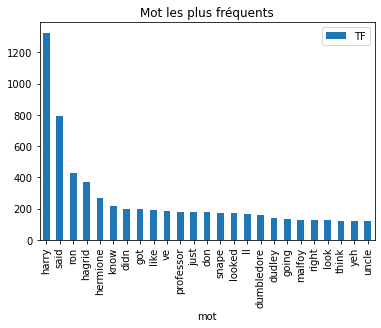

In [38]:
top_f = tff.feature
top_v = tff.score
df = pd.DataFrame({'mot':top_f, 'TF':top_v})
df.plot.bar(x='mot', y='TF', rot=90, title ="Mot les plus fréquents")

Comparer des documents revient à comparer les valeurs de deux colonnes (vecteurs).

In [39]:
import math

# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
    num = np.dot(i, j)
    den = math.sqrt(sum(i*i))*math.sqrt(sum(j*j))
    if (den>0):    
        return (num/den)
    else:
        return 0

In [40]:
print(top_feats_in_doc(X_hp, features_hp, 5, top_n=40))
print(top_feats_in_doc(X_hp, features_hp, 10, top_n=40))

      feature  score
0     dursley      2
1        neck      2
2      called      2
3      blonde      1
4       twice      1
5   neighbors      1
6    dursleys      1
7       beefy      1
8   grunnings      1
9        came      1
10     nearly      1
11      finer      1
12        man      1
13      spent      1
14     fences      1
15      usual      1
16   mustache      1
17    opinion      1
18       time      1
19        mrs      1
20         mr      1
21     hardly      1
22   director      1
23        son      1
24      small      1
25      large      1
26     garden      1
27        did      1
28       firm      1
29        boy      1
30     spying      1
31        big      1
32     useful      1
33     dudley      1
34    craning      1
35     drills      1
     feature  score
0     number      1
1    dursley      1
2       tyke      1
3   chortled      1
4        car      1
5     little      1
6       left      1
7         mr      1
8      house      1
9     backed      1
10 

In [41]:
cosinus(D[5, :], D[10, :])
#cosinus(D[5, :], 10*D[10, :])

0.12909944487358058

# Créer son propre moteur de recherche

Pour créer son propre moteur de recherche maison, la procédure revient à :

* construire un pseudo-document correspondant à la requête, càd un vecteur-requête dans le même espace que les documents
* comparer le vecteur-requête avec tous les vecteurs documents (càd les lignes de la matrice), par ex. avec une mesure cosinus
* trier le vecteur des scores qui en résultent
* afficher les documents qui ont obtenu les meilleurs scores

In [42]:
query = ['privet', 'drive', 'dursley']
#query = ['harry', 'wand']

#query = ['1473', 'aaaaarrrgh']

indexes = [features_hp.index(q) for q in query if q in features_hp]
  # index permet de trouver le numéro correspondant aux mots dans le vocabulaire
print(indexes)

[3491, 1355, 1401]


On construit un vecteur de la même taille que le vocabulaire. Il est initialisé à zéro, puis on y met la valeur 1 pour les termes de la requête.

De manière alternative, on pourrait mettre un poids aux mots de la requête.

In [43]:
query_vec = np.zeros(n_terms)
query_vec[indexes] = 1

In [44]:
#query_vec[5184-10:5184+10]
query_vec[3491-10:3491+10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

On peut vérifier que le vecteur requête contient bien 3 éléments non nuls.

In [45]:
sum(query_vec)

3.0

Calcul du cosinus vis-à-vis de la requête pour 1 document :

In [46]:
cosinus(D[4, :], query_vec)

0.3872983346207417

On automatise en calculant pour tous les docs et on triant le résultat :

In [47]:
# fonction qui crée un dictionnaire associant le cosinus à chaque document
# puis le trie de manière décroissante

def search(q, D):
    cc = {i: cosinus(D[i, :], q) for i in range(n_docs)}
    cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
    return cc

In [48]:
result = search(query_vec, D)

In [49]:
result[0:10]

[(253, 0.8164965809277259),
 (41, 0.47140452079103173),
 (420, 0.40824829046386296),
 (11, 0.3931785497463924),
 (4, 0.3872983346207417),
 (10, 0.33333333333333337),
 (34, 0.33333333333333337),
 (305, 0.3086066999241839),
 (45, 0.28867513459481287),
 (24, 0.2581988897471611)]

On ne retient que les dix premiers résultats (par exemple).

In [50]:
nb_top_docs = 10
top_docs = [r for (r,v) in result[0:nb_top_docs]]
print(top_docs)

[253, 41, 420, 11, 4, 10, 34, 305, 45, 24]


Pour finir, on peut afficher les textes les plus pertinents pour la requête :

In [51]:
for i, td in zip(range(nb_top_docs), top_docs):
    #print(top_feats_in_doc(X_hp, features_hp, td))
    print("%s (%s): %s" % (i+1, td, lines[td]))

1 (253): 4 Privet Drive
2 (41): He didn’t say another word on the subject as they went upstairs to bed. While Mrs. Dursley was in the bathroom, Mr. Dursley crept to the bedroom window and peered down into the front garden. The cat was still there. It was staring down Privet Drive as though it were waiting for something.
3 (420): “DURSLEY!” he boomed.
4 (11): It was on the corner of the street that he noticed the first sign of something peculiar — a cat reading a map. For a second, Mr. Dursley didn’t realize what he had seen — then he jerked his head around to look again. There was a tabby cat standing on the corner of Privet Drive, but there wasn’t a map in sight. What could he have been thinking of? It must have been a trick of the light. Mr. Dursley blinked and stared at the cat. It stared back. As Mr. Dursley drove around the corner and up the road, he watched the cat in his mirror. It was now reading the sign that said Privet Drive — no, looking at the sign; cats couldn’t read maps

Enfin, notez que la matrice construite par *scikit-learn* est une structure dédiée aux matrices creuses provenant de la librairie *scipy* :

In [52]:
type(X_hp)

scipy.sparse.csr.csr_matrix

Il est donc possible de travailler directement avec cette librairie afin d'éviter de passer par une représentation pleine gourmande en mémoire (càd éviter le recours à toarray() de numpy).

Exemple du produit scalaire :

In [53]:
X_hp[4, :].dot(query_vec)

array([3.])

## Quelques éléments d'évaluation

L'objectif consiste à comparer une "vérité terrain" constituée d'un ensemble ou d'une liste ordonnée de réponses idéales avec la sortie proposée par le moteur de recherche.

Si $E$ = liste attendue des documents pertinents (E pour *Expected*) et $O$ = sortie de l'algorithme de recherche (O pour *Output*) :
<img src="img/evaluation.png" style='height: 200px'/>
précision : P = $| E \cap O | / |O|$<br/>
rappel (*recall*) : R = $| E \cap O | / |E|$<br/>
F-mesure : FM = $2 (P\times R) / (P + R)$<br/>